## Objective: To demonstrate structured format of Performing Exploratory data Analysis.


## Overview:
1. Introduction to problem statement

2. Hypothesis generation with respect to problem statement

3. Introduction to dataset

4. Importing dataset and first impressions

5. Variable Identification and Typecasting

6. Univariate Analysis:

    6.1 Numerical Variables

    6.2 Categorical Variables

    6.3 Missing Values

    6.4 Summary of Univariate Analysis
    
7. Bivariate Analysis and Hypothesis Testing

    7.1

## 1. Introduction to problem statement:
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/wns_hack_im_1.jpg">

They Will provided multiple attributes around Employee's past and current performance along with demographics as per your demand. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

## 2. Hypothesis Generation for the problem statement:
**Hypothesis generation is about preparing an exhaustive list of questions or possibilities which directly or indirectly affect the problem statement or the target variable. It is a very important step as it prevents us from going down for a wild goose chase during EDA. 

**This step is performed before looking/gathering dataset**

To generate hypothesis, we require the following:
1. Common Sense or Rationality
2. Domain knowledge if possible
3. Communication with domain experts

Given below are the hypothesis I could think of considering the problem statement

1. Age might an efffect on promotion.
2. Gender of the employee could have an effect on promotion.
3. Is the employee at lower rank more frequently promoted?
4. Are employees with dependent(s) frequently promoted?
5. Are employees with long service record more likely to be promoted?
6. Are employees with more industrial certifications more likely to be promoted?
7. Do metro cities have any effect on promotion rates?
8. Are some deparments observing more promotion rates than others?
9. Do referrals or employees who are hired through referrals more likely to be promoted?
10. Does the performance rating from previous years carry over to the promotions of the current year?

## 3. Introduction to Dataset


| Variable             	| Definition                                                                             	|
|----------------------	|----------------------------------------------------------------------------------------	|
| employee_id          	| Unique ID for employee                                                                 	|
| department           	| Department of employee                                                                 	|
| region               	| Region of employment (unordered)                                                       	|
| education            	| Education Level                                                                        	|
| gender               	| Gender of Employee                                                                     	|
| recruitment_channel  	| Channel of recruitment for employee                                                    	|
| no_of_trainings      	| no of other trainings completed in previous year on soft skills, technical skills etc. 	|
| age                  	| Age of Employee                                                                        	|
| previous_year_rating 	| Employee Rating for the previous year                                                  	|
| length_of_service    	| Length of service in years                                                             	|
| KPIs_met >80%        	| if Percent of KPIs(Key performance Indicators) >80% then 1 else 0                      	|
| awards_won?          	| if awards won during previous year then 1 else 0                                       	|
| avg_training_score   	| Average score in current training evaluations                                          	|
| is_promoted          	| (Target) Recommended for promotion                                                     	|

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('C:/Users/ASUS/Documents/data_HR_analytics.csv')

In [10]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [11]:
#The Data is fairly small with 54K rows observations, although the number of columns are 14

In [12]:
#lets see all the columns in data 
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

# Variable Identification and Typecasting
This is one of the most important steps, Why?

Because pandas is not very good when it comes to recognising the datatype of theimported variables. So in this section, we will be analysing the datatypes of each variables and converting them to respective types.



In [13]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [14]:
# Identifying variables with integer datatype
df.dtypes[df.dtypes == 'int64']

employee_id           int64
no_of_trainings       int64
age                   int64
length_of_service     int64
KPIs_met >80%         int64
awards_won?           int64
avg_training_score    int64
is_promoted           int64
dtype: object

In [15]:
#Allthe variables seems to be in correct data format but let us convert the three col i.e KPI,Awards won,is promoted to
#category as they have only 0 and 1

In [16]:
# converting awards_won to category
df['awards_won?'] = df['awards_won?'].astype('category')
df['KPIs_met >80%']=df['KPIs_met >80%'].astype('category')
df['is_promoted']=df['is_promoted'].astype('category')
df.dtypes[df.dtypes == 'int64']

employee_id           int64
no_of_trainings       int64
age                   int64
length_of_service     int64
avg_training_score    int64
dtype: object

In [17]:
# Identifying variables with float datatype
df.dtypes[df.dtypes == 'float64']

previous_year_rating    float64
dtype: object

In [18]:
#rating good to be considered as float

In [19]:
df.dtypes[df.dtypes == 'object']

department             object
region                 object
education              object
gender                 object
recruitment_channel    object
dtype: object

In [20]:
variables like 'department', 'region','education','gender' and 'recruitment_channel, are of type object.
This means that Pandas was not able to recognise the datatype of these five variables.

SyntaxError: invalid syntax (<ipython-input-20-5286435851a7>, line 1)

In [21]:
# Manually checking object types
df[['gender','education','department','region','recruitment_channel']].head(7)

,gender,education,department,region,recruitment_channel
0,f,Master's & above,Sales & Marketing,region_7,sourcing
1,m,Bachelor's,Operations,region_22,other
2,m,Bachelor's,Sales & Marketing,region_19,sourcing
3,m,Bachelor's,Sales & Marketing,region_23,other
4,m,Bachelor's,Technology,region_26,other
5,m,Bachelor's,Analytics,region_2,sourcing
6,f,Bachelor's,Operations,region_20,other


In [ ]:
#gender,education,department ,region and recruitment channel variables belong to categorical data types.

In [27]:
# typecasting "gender" and "occupation" to category type
df['gender'] = df['gender'].astype('category')
df['education'] = df['education'].astype('category')
df['department'] = df['department'].astype('category')
df['region'] = df['region'].astype('category')
df['recruitment_channel'] = df['recruitment_channel'].astype('category')
# checking
df[['gender','recruitment_channel','education','region','department']].dtypes

gender                 category
recruitment_channel    category
education              category
region                 category
department             category
dtype: object

# Univariate Analysis: Numerical Variables
When dealing with numerical variables, we have to check their properties like:

Mean
Median
Standard Deviation
Kurtosis/skewness
distribution/range

In [28]:
# Numerical datatypes
df.select_dtypes(include=['int64','float64','Int64']).dtypes

employee_id               int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
avg_training_score        int64
dtype: object

In [29]:
# finding number of missing values in every variable
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [25]:
lets do the univariate analysis of few variables

SyntaxError: invalid syntax (<ipython-input-25-0767dbf6de8c>, line 1)

In [34]:
df['age'].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [49]:
df['KPIs_met >80%'].value_counts().

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [50]:
df['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [ ]:
lets create age binsto check accordingly with the other variables

In [42]:
df['age_bin']=pd.cut(x=df['age'], bins=[20,30,40,50,60])

In [43]:
df[['age','age_bin']]

,age,age_bin
0,35,"(30, 40]"
1,30,"(20, 30]"
2,34,"(30, 40]"
3,39,"(30, 40]"
4,45,"(40, 50]"
...,...,...
54803,48,"(40, 50]"
54804,37,"(30, 40]"
54805,27,"(20, 30]"
54806,29,"(20, 30]"


In [ ]:
this shows us that 50 to 75 percent of employees are between 30 to 40 years

In [57]:
pd.crosstab(df['age_bin'],df['gender'],normalize='index').round(2)

gender,f,m
age_bin,,
"(20, 30]",0.29,0.71
"(30, 40]",0.31,0.69
"(40, 50]",0.28,0.72
"(50, 60]",0.36,0.64


In [46]:
pd.crosstab(df['age_bin'], df['no_of_trainings'], df['KPIs_met >80%'], aggfunc='count',normalize='index').round(2)

no_of_trainings,1,2,3,4,5,6,7,8,9,10
age_bin,,,,,,,,,,
"(20, 30]",0.78,0.16,0.04,0.01,0.0,0.0,0.0,0.0,0.0,0.0
"(30, 40]",0.81,0.15,0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0
"(40, 50]",0.86,0.11,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.0
"(50, 60]",0.88,0.09,0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
pd.crosstab(df['age_bin'], df['no_of_trainings'], df['KPIs_met >80%'], aggfunc='count',normalize='columns').round(2)

no_of_trainings,1,2,3,4,5,6,7,8,9,10
age_bin,,,,,,,,,,
"(20, 30]",0.32,0.37,0.43,0.48,0.53,0.55,0.50,0.4,1.0,0.2
"(30, 40]",0.48,0.49,0.45,0.42,0.30,0.25,0.42,0.4,0.0,0.2
"(40, 50]",0.15,0.11,0.08,0.08,0.11,0.18,0.08,0.2,0.0,0.2
"(50, 60]",0.06,0.03,0.03,0.02,0.05,0.02,0.00,0.0,0.0,0.4


In [53]:
pd.crosstab(df['age_bin'], df['KPIs_met >80%'],df['is_promoted'], aggfunc='count',normalize='columns').round(2)

KPIs_met >80%,0,1
age_bin,,
"(20, 30]",0.33,0.33
"(30, 40]",0.47,0.49
"(40, 50]",0.15,0.13
"(50, 60]",0.06,0.04


In [ ]:
#in this we can see that the age bin 20 30 shows that even though they met the criteria they are not promoted whereas the 

In [54]:
pd.crosstab(df['age_bin'], df['KPIs_met >80%'],df['is_promoted'], aggfunc='count',normalize='index').round(2)

KPIs_met >80%,0,1
age_bin,,
"(20, 30]",0.65,0.35
"(30, 40]",0.64,0.36
"(40, 50]",0.67,0.33
"(50, 60]",0.70,0.30


In [61]:
pd.crosstab(df['avg_training_score'],df['is_promoted'],df['age_bin'],aggfunc='count',normalize='index').round(2)

is_promoted,0,1
avg_training_score,,
39,1.00,0.00
40,1.00,0.00
41,0.96,0.04
42,0.97,0.03
43,0.96,0.04
...,...,...
95,0.00,1.00
96,0.02,0.98
97,0.00,1.00


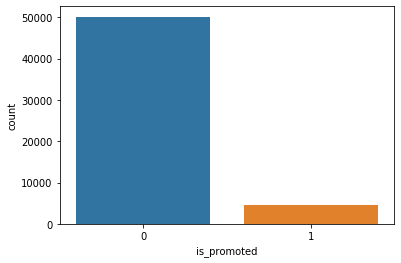

In [64]:
sns.countplot(df['is_promoted'],label='count')

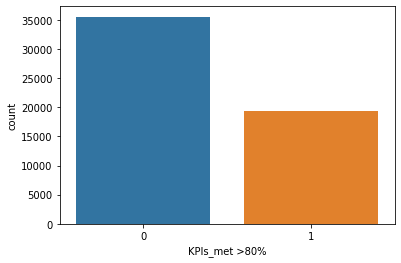

In [65]:
sns.countplot(df['KPIs_met >80%'],label='count')

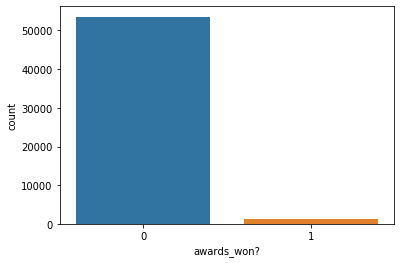

In [71]:
sns.countplot(df['awards_won?'],label='count')


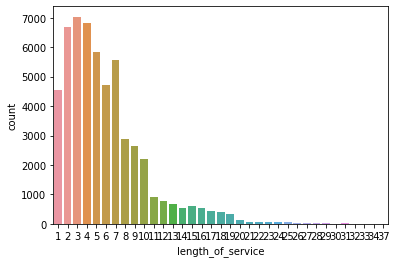

In [72]:
sns.countplot(df['length_of_service'],label='count')